## Observations and Insights 

1. Looking at the statistical summary of the 9 drug regimens in the study, we see that Capomulin and Ramicane had the best results. When separating these out into the promising drugs with 2 others, we can see by the box plots how these outperformed the rest.
2. There were 248 mouse subjects in this study. With each mouse being tested with 1 drug, on average, there are about 27 mice per drug regimen. No drug had more than 250 measurements taken. I would say that the conclusions made from this study are limited because of it's relatively small sample population. We should also note that there isn't a control group included in this data set. Because of this, we are not able to show how these treated mice compare to non-treated mice.
3. Mouse Gender for the subjects was about equally distributed as shown in the pie charts.
4. Ave Tumor Size vs Mouse Weight for the Capomulin Study shows a strong positive relationship (.84 correlation coefficient), meaning the bigger the mouse, the bigger the tumor.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_study_complete['Mouse ID'].unique())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
mice_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete[mouse_study_complete['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete = mouse_study_complete[mouse_study_complete['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_2 = len(mouse_study_complete['Mouse ID'].unique())
number_of_mice_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_grp = mouse_study_complete.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_ave = drug_grp['Tumor Volume (mm3)'].mean()
tumor_median = drug_grp['Tumor Volume (mm3)'].median()
tumor_variance = drug_grp['Tumor Volume (mm3)'].var()
tumor_std_dev = drug_grp['Tumor Volume (mm3)'].std()
tumor_smpl_err = drug_grp['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_drug_grp_df = pd.DataFrame({'Mean': round(tumor_ave, 2),
                                   'Median': round(tumor_median, 2),
                                   'Variance': round(tumor_variance, 2),
                                   'Standard Deviation': round(tumor_std_dev, 2),
                                   'Sampling Error': round(tumor_smpl_err, 2)
                                   })
summary_drug_grp_df

,Mean,Median,Variance,Standard Deviation,Sampling Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_drug_grp_agg_df = mouse_study_complete[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').agg(
    ['mean', 'median', 'var', 'std', 'sem']).round(2)
summary_drug_grp_agg_df

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

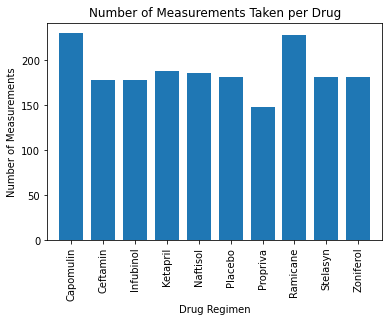

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
number_of_measurements_per_drug = drug_grp['Mouse ID'].count()

x_axis = np.arange(len(number_of_measurements_per_drug))

number_of_measurements_per_drug.plot(kind = 'bar', width = 0.75, align = 'center')

plt.xlim(-.75, len(x_axis) - .25)
plt.title('Number of Measurements Taken per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

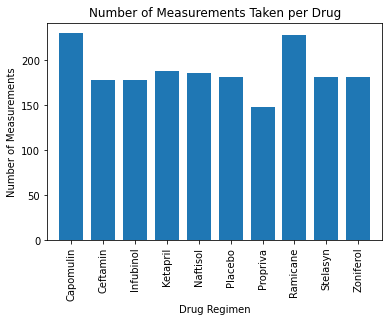

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(x = x_axis, height = number_of_measurements_per_drug, width = .75, align = "center")

plt.xticks(x_axis, number_of_measurements_per_drug.index, rotation = 90)
plt.xlim(-.75, len(x_axis) - .25)
plt.title('Number of Measurements Taken per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

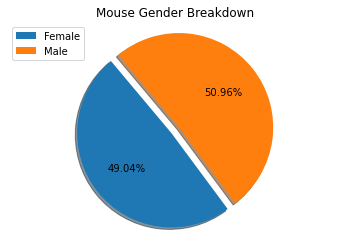

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
number_of_measurements_per_gender = mouse_study_complete[['Sex', 'Mouse ID']].groupby('Sex').count()

number_of_measurements_per_gender.plot(
    kind = 'pie', y = 'Mouse ID', labels = ['', ''], startangle = 130, shadow = True, explode = (.1, 0), autopct = '%.2f%%')

plt.ylabel('')
plt.legend(loc = 'upper left', labels = number_of_measurements_per_gender.index)
plt.title('Mouse Gender Breakdown')
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

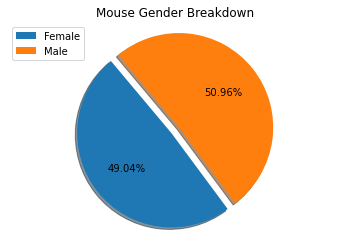

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(number_of_measurements_per_gender['Mouse ID'], labels = ['', ''],
       startangle = 130, shadow = True, explode = (.1, 0), autopct = '%.2f%%')

plt.legend(loc = 'upper left', labels = number_of_measurements_per_gender.index)
plt.title('Mouse Gender Breakdown')
plt.axis('equal')
plt.show


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = mouse_study_complete[['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_complete_at_max_timepoint = pd.merge(mouse_study_complete, max_timepoint_per_mouse, 
                                                   on = ['Mouse ID', 'Timepoint'])
mouse_study_complete_at_max_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# create last timepoint df for Capomulin to find outliers from
max_timepoint_capomulin_df = mouse_study_complete_at_max_timepoint.loc[
    mouse_study_complete_at_max_timepoint['Drug Regimen'] == 'Capomulin']

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Capomulin
capomulin_end_tumor_vol = max_timepoint_capomulin_df['Tumor Volume (mm3)']
capomulin_quartiles = capomulin_end_tumor_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)

# find and display any outliers for Capomulin
capomulin_outliers = max_timepoint_capomulin_df[(
    capomulin_end_tumor_vol < capomulin_lower_bound) | (capomulin_end_tumor_vol > capomulin_upper_bound)]
capomulin_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [16]:
# create last timepoint df for Ramicane to find outliers from
max_timepoint_ramicane_df = mouse_study_complete_at_max_timepoint.loc[
    mouse_study_complete_at_max_timepoint['Drug Regimen'] == 'Ramicane']

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane
ramicane_end_tumor_vol = max_timepoint_ramicane_df['Tumor Volume (mm3)']
ramicane_quartiles = ramicane_end_tumor_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5 * ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5 * ramicane_iqr)

# find and display any outliers for Ramicane
ramicane_outliers = max_timepoint_ramicane_df[(
    ramicane_end_tumor_vol < ramicane_lower_bound) | (ramicane_end_tumor_vol > ramicane_upper_bound)]
ramicane_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [18]:
# create last timepoint df for Infubinol to find outliers from
max_timepoint_infubinol_df = mouse_study_complete_at_max_timepoint.loc[
    mouse_study_complete_at_max_timepoint['Drug Regimen'] == 'Infubinol']

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol
infubinol_end_tumor_vol = max_timepoint_infubinol_df['Tumor Volume (mm3)']
infubinol_quartiles = infubinol_end_tumor_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)

# find and display any outliers for Infubinol
infubinol_outliers = max_timepoint_infubinol_df[(
    infubinol_end_tumor_vol < infubinol_lower_bound) | (infubinol_end_tumor_vol > infubinol_upper_bound)]
infubinol_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
74,c326,Infubinol,Female,18,25,5,36.321346,0


In [20]:
# create last timepoint df for Ceftamin to find outliers from
max_timepoint_ceftamin_df = mouse_study_complete_at_max_timepoint.loc[
    mouse_study_complete_at_max_timepoint['Drug Regimen'] == 'Ceftamin']

In [21]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin
ceftamin_end_tumor_vol = max_timepoint_ceftamin_df['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin_end_tumor_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)

# find and display any outliers for Ceftamin
ceftamin_outliers = max_timepoint_ceftamin_df[(
    ceftamin_end_tumor_vol < ceftamin_lower_bound) | (ceftamin_end_tumor_vol > ceftamin_upper_bound)]
ceftamin_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


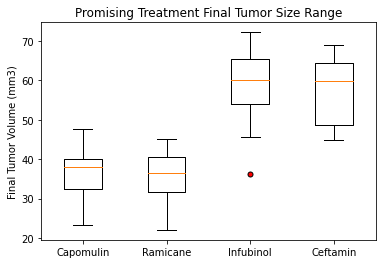

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
columns = [max_timepoint_capomulin_df['Tumor Volume (mm3)'],
          max_timepoint_ramicane_df['Tumor Volume (mm3)'],
          max_timepoint_infubinol_df['Tumor Volume (mm3)'],
          max_timepoint_ceftamin_df['Tumor Volume (mm3)']]
fig, ax = plt.subplots()
ax.set_title('Promising Treatment Final Tumor Size Range')
ax.set_ylabel('Final Tumor Volume (mm3)')
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
ax.boxplot(columns, labels=labels, flierprops = {'markerfacecolor': 'red', 'markersize': 5})
plt.show()

## Line and Scatter Plots

In [23]:
# create a df for Capomulin to work off of
capomulin_df = mouse_study_complete.loc[mouse_study_complete['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


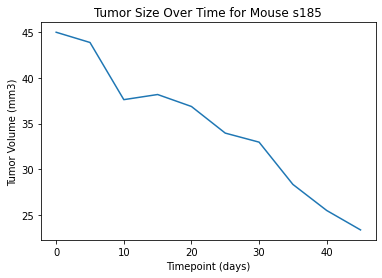

In [28]:
# create df just for mouse s185 to build a line graph for
mouse_s185 = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Size Over Time for Mouse s185')
plt.show()

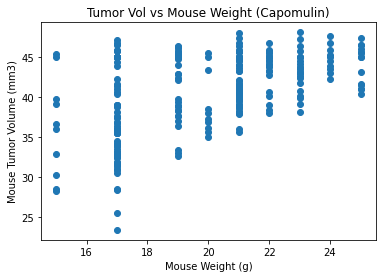

In [25]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mouse Tumor Volume (mm3)')
plt.title('Tumor Vol vs Mouse Weight (Capomulin)')
plt.show()

## Correlation and Regression

In [29]:
# Start by getting the average Weight and Tumor Volume per Mouse and naming the new DataFrame to plot
ave_tumor_vol_per_mouse_capomulin = capomulin_df[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']].groupby('Mouse ID').mean()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


The Correlation Coefficient is: 0.8419


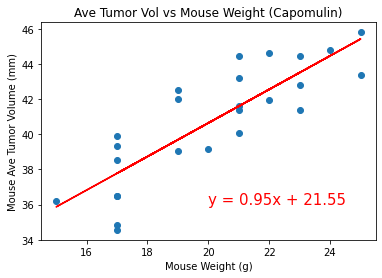

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = ave_tumor_vol_per_mouse_capomulin['Weight (g)']
y_values = ave_tumor_vol_per_mouse_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (20, 36), fontsize=15, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mouse Ave Tumor Volume (mm)')
plt.title('Ave Tumor Vol vs Mouse Weight (Capomulin)')
plt.show
print(f'The Correlation Coefficient is: {round(rvalue, 4)}')